## Simulation of a Bouncing Basketball

### Aim
To show the trajectory of a bouncing ball as it loses energy to the point where it stops

### Description of the projectile motion
* The ball falls and bounces off the surface of the ground then travels upwards towards its highest point but not reaching the original height it had fallen from
* The ball decelerates, changes direction once it has reached its peak and starts falling to the ground
* The ball is momentarily deformed, and bounces off the ground in an upward direction.
* The ball experiences damping, where it loses potential energy and kinetic energy as it falls, leading to reduction in maximum height over time and eventually coming to a stop due to friction forces like air resistance (which is assumed to be zero in an ideal scenareo)
* At the point of maximum height, the ball momentarily has zero velocity and he direction of velocity changes from positive to negative, acceleration, which is gravity, acts downward on the ball
* At the lowest point, the ball has minimum potential energy, velocity changes from negative to positive.
* Potential energy causes the ball to hit the floor and is the converted to kinetic energy and causes the ball to move upward. This is described by Newton's third law of motion
* This motion of a bouncing ball can be describes using a geometric sequence

### Assumptions
1. Velocity and acceleration are stricly vertical and linear. The basketball is not travelling horizontally or rotating
2. Negligible loss to air resistance
3. Impact time is independent of impact velocity

### Equations governing the motion
* height after last bounce at t<sub>0</sub> where velocity after last bounce is v<sub>0</sub>
       $$ h(t+t_0) = v_0 - \frac{1}{2}gt^2 $$
* Time spent in the air until the next bounce is given by 
       $$ t_1 = 2\frac{v_1}{g} = 2\rho\frac{v_0}{g}$$
       $\rho$ = coifficient of restitution(accounting for loss of energy after bounce)

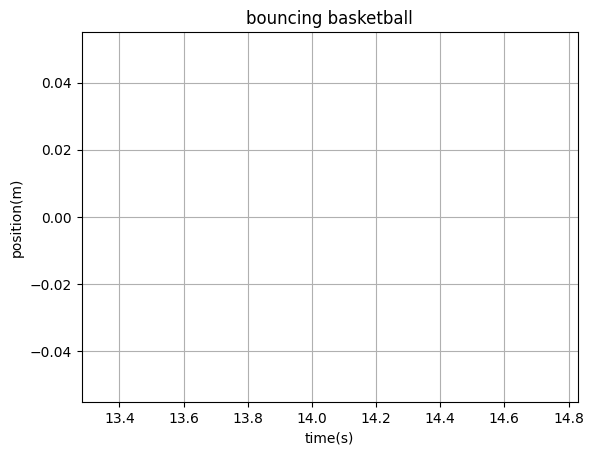

In [2]:
import matplotlib.pyplot as plt
from math import sqrt

init_position = 10
velocity = 0
gravity = 9.8
time = 0
dt = 0.001
energy_loss_factor = 0.8
contact_time = 0.10
max_position = init_position
position = init_position
stop_position = 0.01
freefall = True
last_time = -sqrt(2*init_position/gravity)
max_velocity = sqrt(2*max_position*gravity)
positions = []
times = []

while(max_position > stop_position):
    if(freefall):
        new_position = position + velocity*dt - 0.5*gravity*dt*dt
        if(new_position<0):
            time = last_time + 2*sqrt(2*max_position/gravity)
            freefall = False
            last_time = time + contact_time
            position = 0
        else:
            time = time +dt
            velocity = velocity - gravity*dt
            position = new_position
    else:
        time = time + contact_time
        max_velocity = max_velocity * energy_loss_factor
        velocity = max_velocity
        freefall = True
        position = 0
    max_position = 0.5 * max_velocity * max_velocity / gravity
    
positions.append(position)
times.append(time)
        

# plot
plt.plot(times, positions)
plt.xlabel('time(s)')
plt.ylabel('position(m)')
plt.title('bouncing basketball')
plt.grid(True)
plt.show()